# Asociación y agrupación de datos

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
COMBINED_PREPROCESSED_DATASET_PATH = "../datasets/preprocessed/combined_dataset.json"
combined_dataset = pd.read_json(COMBINED_PREPROCESSED_DATASET_PATH)
combined_dataset.head()

,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,Zone,starting_point,StopID,PackageID,planned_service_time_seconds,...,weight_cm,time_to_arrive,day_of_week,month,StartLat,StartLon,StopLat,StopLon,distance_lat,distance_lon
0,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_fd17bd67-a3d8-45b9-936b-c7e9d879102e,31.5,...,30.5,703.9,Sunday,6,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710
1,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_f78261e7-4c8c-4d72-b007-9934a53a700b,31.5,...,17.8,703.9,Sunday,6,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710
2,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AJ,PackageID_a8e394ee-4208-412d-8b34-8cbce880a322,40.0,...,17.8,670.6,Sunday,6,33.918699,-118.324843,33.902808,-118.355223,0.015891,0.030380
3,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_b7c39ed4-fa0a-497a-ae0c-e3515734f8ae,47.0,...,21.8,789.6,Sunday,6,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265
4,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_e980c24b-ab88-4af1-b3f9-1f851823f561,47.0,...,35.6,789.6,Sunday,6,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265


In [4]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714569 entries, 0 to 714568
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RouteID                       714569 non-null  object 
 1   station_code                  714569 non-null  object 
 2   date_YYYY_MM_DD               714569 non-null  object 
 3   departure_time_utc            714569 non-null  object 
 4   executor_capacity_cm3         714569 non-null  float64
 5   Zone                          714569 non-null  object 
 6   starting_point                714569 non-null  object 
 7   StopID                        714569 non-null  object 
 8   PackageID                     714569 non-null  object 
 9   planned_service_time_seconds  714569 non-null  float64
 10  depth_cm                      714569 non-null  float64
 11  height_cm                     714569 non-null  float64
 12  weight_cm                     714569 non-nul

## Asociación de datos

Tratamiento del conjunto de datos para crear una estructura de datos que permita la asociación de los datos de los diferentes ficheros. Se eliminan los datos que no se van a utilizar y se crea un nuevo dataframe con los datos asociados.

In [5]:
# Keep only fields that are relevant for this analysis
# Keep: 'station_code', 'starting_point', 'StopID'

Utilizar apriori y FP Growth para obtener los conjuntos de datos frecuentes y las reglas de asociación.

Dada una parada cual es la estación asociada para calcular el tiempo de espera.

## Agrupación de datos

Mostrar dendograma de las estaciones de salida agrupaas por zona

In [35]:
Zone = combined_dataset['Zone']
Zone = Zone.drop_duplicates()
Zone

0         K-21
287        E-4
450        D-1
647       B-10
920        B-9
          ... 
643237    O-11
656903    B-33
693960    B-32
699873     M-7
707616     F-2
Name: Zone, Length: 331, dtype: object

In [9]:
data2=combined_dataset.drop(['RouteID',	'station_code',	'date_YYYY_MM_DD',	'departure_time_utc',	'executor_capacity_cm3',	'starting_point',	'StopID',	'PackageID',	'planned_service_time_seconds', 'depth_cm',  'height_cm'	,'weight_cm', 'time_to_arrive', 'day_of_week',	'month', 'StopLon',  'StopLat', 
'distance_lat',	'distance_lon'],axis=1)
data2

,Zone,StartLat,StartLon
0,K-21,33.918699,-118.324843
1,K-21,33.918699,-118.324843
2,K-21,33.918699,-118.324843
3,K-21,33.918699,-118.324843
4,K-21,33.918699,-118.324843
...,...,...,...
714564,G-18,33.965477,-117.653303
714565,G-18,33.965477,-117.653303
714566,G-18,33.965477,-117.653303
714567,G-18,33.965477,-117.653303


In [13]:
data2=data2.drop_duplicates()
data2

,Zone,StartLat,StartLon
0,K-21,33.918699,-118.324843
287,E-4,34.234850,-118.584210
450,D-1,34.234850,-118.584210
647,B-10,47.937344,-122.244952
920,B-9,34.007369,-118.143927
...,...,...,...
710510,C-15,33.688122,-117.847178
711686,J-13,33.918699,-118.324843
712388,C-2,33.918699,-118.324843
712636,P-5,47.542170,-122.328049


## Agrupación Jerarquica

In [19]:
# importamos las librerías
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

Zones = data2['Zone']
# Se eliminan la columna de nombre y la clase
X = data2.drop(['Zone'],axis=1)



### Single Link (MIN)

Text(0, 0.5, 'Localización por Zonas')

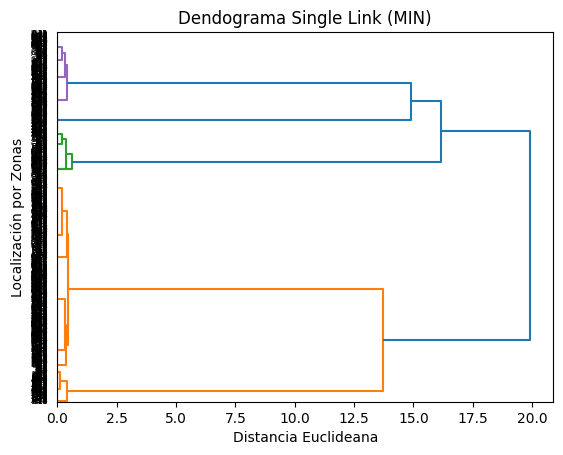

In [27]:
Z = hierarchy.single(X)
dn = hierarchy.dendrogram(Z,labels=Zones.tolist(),orientation='right')

plt.title('Dendograma Single Link (MIN)')
plt.xlabel('Distancia Euclideana')
plt.ylabel('Localización por Zonas')

### Complete Link (MAX)

Text(0, 0.5, 'Localización por Zonas')

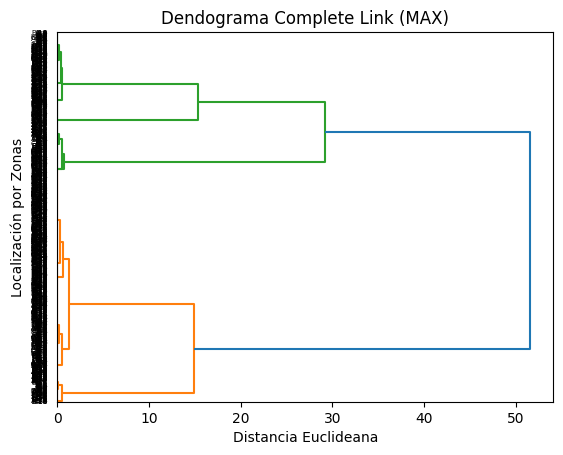

In [26]:
Z = hierarchy.complete(X)
dn = hierarchy.dendrogram(Z,labels=Zones.tolist(),orientation='right')

plt.title('Dendograma Complete Link (MAX)')
plt.xlabel('Distancia Euclideana')
plt.ylabel('Localización por Zonas')

### Average - Promedio

Text(0, 0.5, 'Localización por Zonas')

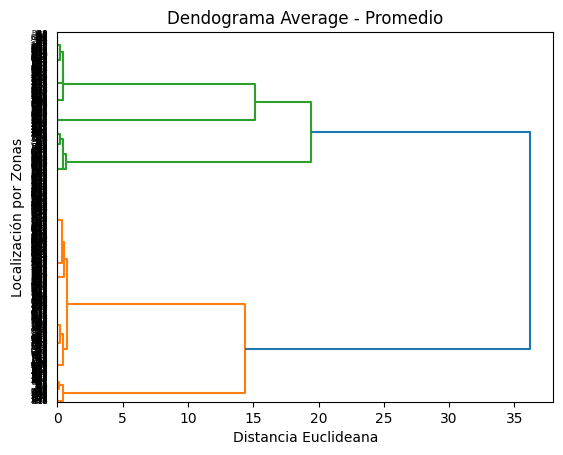

In [31]:
Z = hierarchy.average(X)
dn = hierarchy.dendrogram(Z,labels=Zones.tolist(),orientation='right')

plt.title('Dendograma Average - Promedio')
plt.xlabel('Distancia Euclideana')
plt.ylabel('Localización por Zonas')

### Ward

Text(0, 0.5, 'Localización por Zonas')

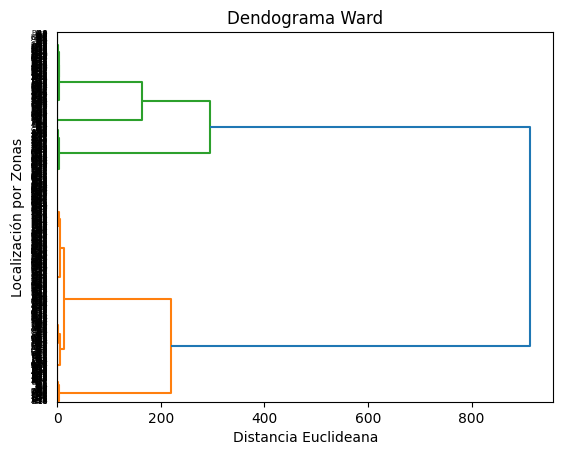

In [33]:
Z = hierarchy.ward(X)
dn = hierarchy.dendrogram(Z,labels=Zones.tolist(),orientation='right')

plt.title('Dendograma Ward')
plt.xlabel('Distancia Euclideana')
plt.ylabel('Localización por Zonas')

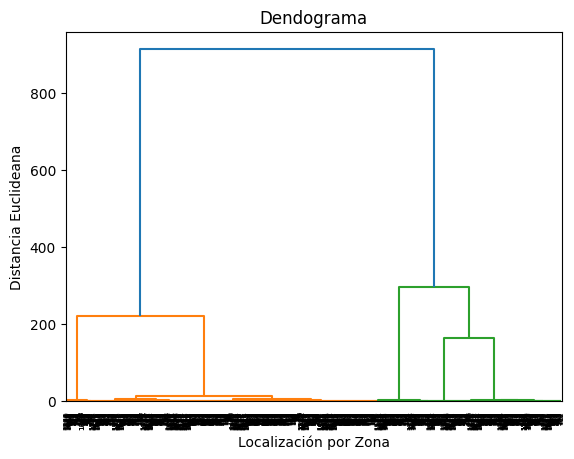

In [24]:
datapoints = data2.iloc[:,[1,2]].values

dend = hierarchy.dendrogram(hierarchy.linkage(datapoints,method='ward'))

plt.title('Dendograma')
plt.xlabel('Localización por Zona')
plt.ylabel('Distancia Euclideana')
plt.show()

### Agrupamiento Aglomerativo

In [21]:
from sklearn.cluster import AgglomerativeClustering


clust = AgglomerativeClustering(n_clusters= 5, metric='euclidean', linkage='ward')

plot=clust.fit_predict(datapoints)

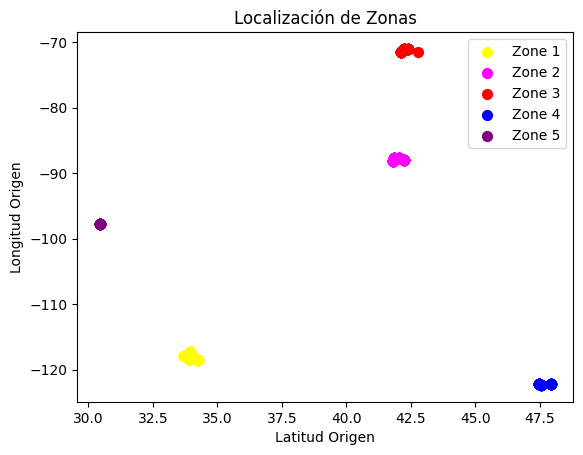

In [22]:
plt.scatter(datapoints[plot == 0,0], datapoints[plot ==0,1], s=50, c='yellow', label = 'Zone 1')
plt.scatter(datapoints[plot == 1,0], datapoints[plot ==1,1], s=50, c='magenta', label = 'Zone 2')
plt.scatter(datapoints[plot == 2,0], datapoints[plot ==2,1], s=50, c='red', label = 'Zone 3')
plt.scatter(datapoints[plot == 3,0], datapoints[plot ==3,1], s=50, c='blue', label = 'Zone 4')
plt.scatter(datapoints[plot == 4,0], datapoints[plot ==4,1], s=50, c='purple', label = 'Zone 5')
plt.title('Localización de Zonas')
plt.xlabel('Latitud Origen')
plt.ylabel('Longitud Origen')
plt.legend()
plt.show()


Cluster por distancias de las rutas. <- DBScan

In [11]:
data=combined_dataset.drop(['RouteID',	'station_code',	'date_YYYY_MM_DD',	'departure_time_utc',	'executor_capacity_cm3',	'Zone',	'starting_point',	'StopID',	'PackageID',	'planned_service_time_seconds', 'depth_cm',  'height_cm'	,'weight_cm', 'time_to_arrive', 'day_of_week',	'month', 'StartLon', 'StopLon',  'StartLat', 'StopLat'],axis=1)
data

,distance_lat,distance_lon
0,0.033219,0.019710
1,0.033219,0.019710
2,0.015891,0.030380
3,0.025083,0.033265
4,0.025083,0.033265
...,...,...
714564,0.187385,0.150968
714565,0.187385,0.150968
714566,0.187385,0.150968
714567,0.190235,0.124780


In [12]:
data= data.drop_duplicates()
data

,distance_lat,distance_lon
0,0.033219,0.019710
2,0.015891,0.030380
3,0.025083,0.033265
5,0.027323,0.025405
6,0.038582,0.019667
...,...,...
714561,0.182501,0.157024
714562,0.194400,0.153685
714564,0.187385,0.150968
714567,0.190235,0.124780


<Axes: xlabel='distance_lat', ylabel='distance_lon'>

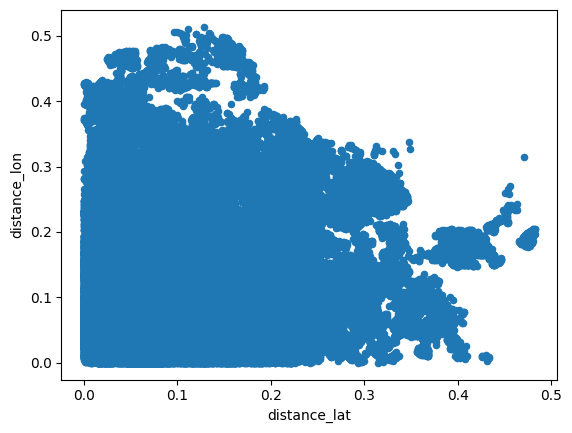

In [17]:
data.plot.scatter(x='distance_lat',y='distance_lon')

In [41]:
data2 = data.sample(n=20000).copy()

<Axes: xlabel='distance_lat', ylabel='distance_lon'>

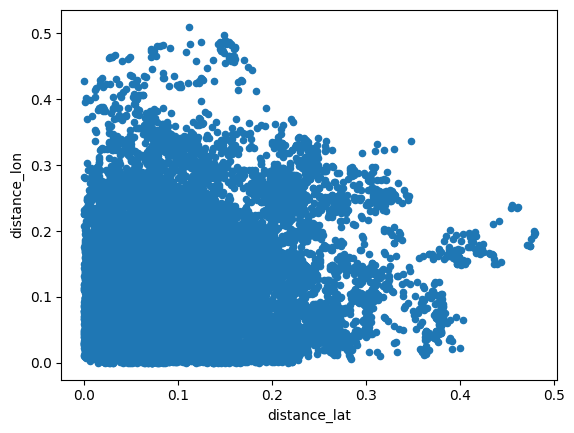

In [42]:
data2.plot.scatter(x='distance_lat',y='distance_lon')

<Axes: xlabel='distance_lat', ylabel='distance_lon'>

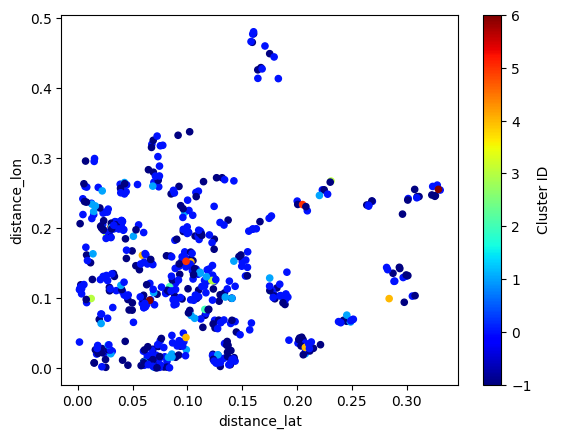

In [70]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.01, min_samples=100).fit(data2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data2,labels), axis=1)
result.plot.scatter(x='distance_lat',y='distance_lon',c='Cluster ID', colormap='jet')